## Sieci wielowarstwowe

Perceptrony są zasadniczo ograniczone przez ich możliwości do dzielenia przestrzeni za pomocą hiperpłaszczyzn. Jeżeli grupy nie są liniowo separowalne, do ich klasyfikacji potrzebne są bardziej złożone mechanizmy, np. sieci wielowartwowe. Dodanie kolejnej warstwy na wyjściu poprzedniej pozwala na zbudowanie znacznie bardziej skomplikowanej funkcji podziału przestrzeni, wiąże się jednak z różnymi utrudnieniami, m.in. uczenia.


## Problem XOR
Zbudujemy prostą sieć neuronową z jedną warstwą ukrytą.
Wykorzystamy ją do rozwiązania problemu XOR. Jest to potencjalnie banalne zadanie, które jednak jest nieliniowe.\
W ramach przypomnienia, weźmy tabelę wartości logicznych XOR



X1  | X2  | Y_XOR

 0  | 0   | 0\
 0  | 1   | 1\
 1  | 0   | 1\
 1  | 1   | 0

Oczekujemy:
- Na wejściu: x1 i x2
- Na wyjściu: x1 XOR x2


W ksiązce "Perceptrony: wprowadzenie do geometrii obliczeniowej" autorstwa Marvina Minsky'ego i Seymoura Paperta (1969) wyraźnie stwierdzone zostaje, że sieć neuronowa z jednym neuronem nie może rozwiązać problemu XOR (czyli alternatywy wykluczającej).

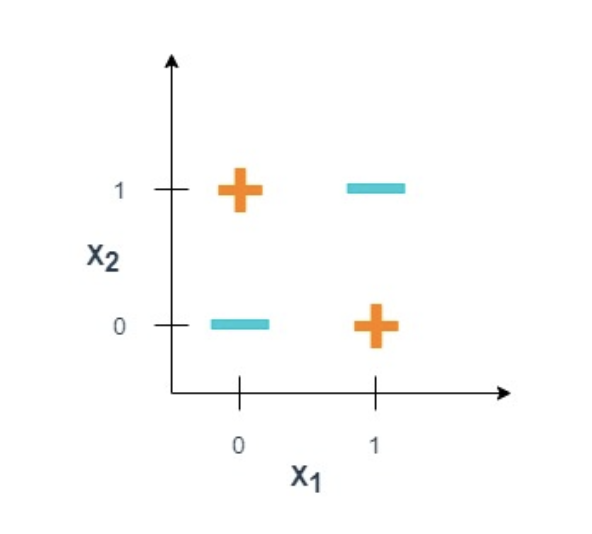

In [2]:
import numpy as np

# tablica wejść
X = np.array([
    [1,1],
    [0,0],
    [1,0],
    [0,1]
], dtype=np.float32)
X

array([[1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [3]:
# tablica oczekiwanych wyjść
y = np.array([
    0,
    0,
    1,
    1
], dtype=np.float32)
y

array([0., 0., 1., 1.], dtype=float32)

In [4]:
# zastosowanie pojedynczego Perceptronu do rozwiazania problemu
from sklearn.linear_model import Perceptron

neuron = Perceptron(tol=1e-3, max_iter = 1000)

neuron.fit(X, y)

# możemy zobaczyć, że maksymalne accuracy, jakie jesteśmy w stanie osiągnąć, to 0.5.
# Nie jesteśmy w stanie tak podzielić przestrzeni jedną prostą,
# by podzieliła ją na dwie części zgodnie z problemem XOR.
print('score:', neuron.score(X, y))
print('predictions:', neuron.predict(X))

score: 0.5
predictions: [0. 0. 0. 0.]


In [5]:
# zastosowanie do tego samego problemu prostej sieci wielowarstwowej
from sklearn.neural_network import MLPClassifier

# tworzymy sieć z 5 neuronami na wejściu i 5 neuronami w warstwie ukrytej
model = MLPClassifier(hidden_layer_sizes = (5,5), max_iter=2000)

# możemy zobaczyć, że teraz już wyjście powinno zgadzać się z naszymi oczekiwaniami
model.fit(X, y)
print('score:', model.score(X,y))
print('predictions:', model.predict(X))

score: 1.0
predictions: [0. 0. 1. 1.]


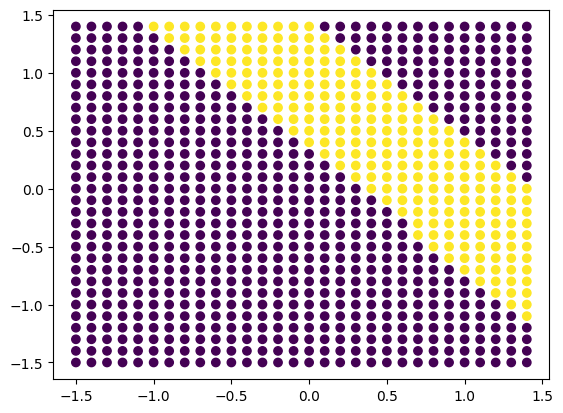

In [6]:
# Nie jest już tak łatwo narysować funkcji podziału przestrzeni, bo jej wzór zrobił się znacznie bardziej skomplikowany.
# Jeżeli jednak chcemy zobaczyć przybliżony podział, możemy zobaczyć, jak będą wyglądały predykcje dla siatki punktów.
import matplotlib.pyplot as plt

# tymi funkcjami zbudujemy siatkę 2d
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.1), np.arange(-1.5, 1.5, 0.1))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

# robimy predykcję dla naszych punktów
prediction = model.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

### Różne funkcje aktywacji

Klasyczny perceptron używa głównie prostej schodkowej funkcji aktywacji, jednak w praktyce częściej wykorzystuje się funkcje pozwalające na łatwiejszą interpretację wyniku i na liczenie pochodnej po tym wyniku (co jest potrzebne do uczenia). Przykładowe funkcje wykorzystywane w sieciach neuronowych:

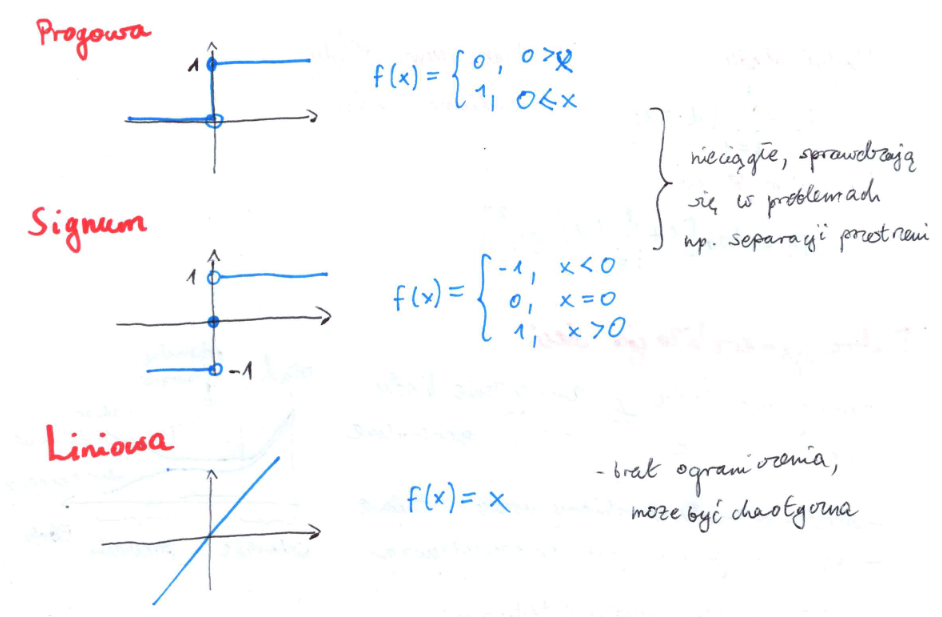

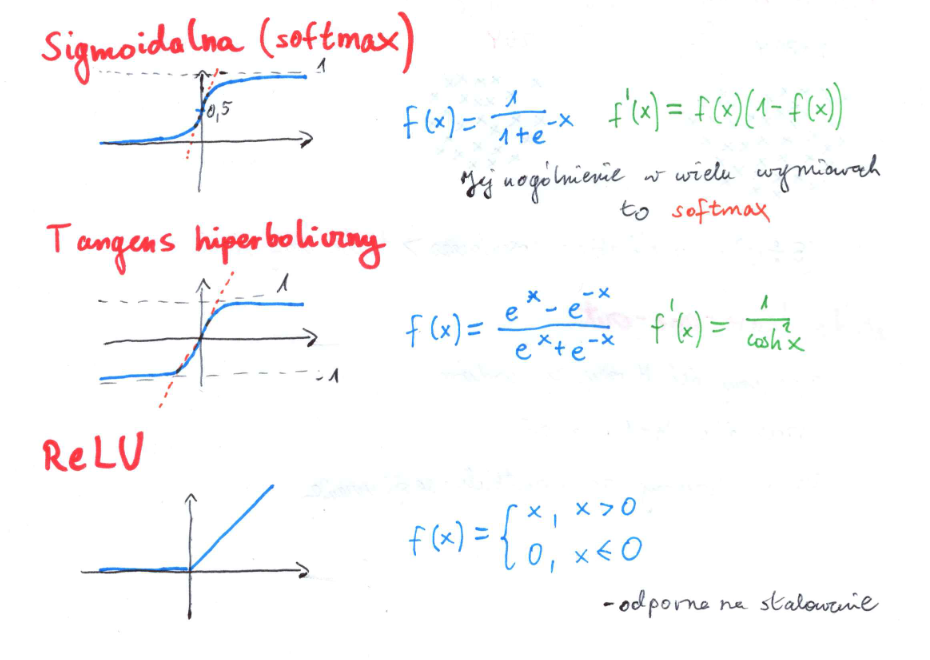

Teraz przyjrzyjmy się sieci ułożonej z kilku warstw:

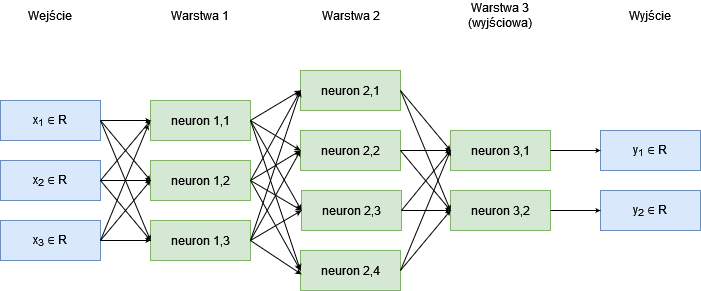

Jeżeli zamierzamy przeprowadzić uczenie sieci z nauczycielem, nie możemy tego zrobić prostymi metodami takimi jak metoda Widrowa-Hoffa ze względu na ukrytą warstwę. Zamiast tego używamy algorytmów, które:


*   Liczą **pochodną funkcji błędu** po każdej wadze i każdym biasie
*   Przesuwają wagę zgodnie z pochodną w stronę jej minimum

Najprościej można przedstawić działanie algorytmów optymalizujących wagi jako:

$W^{iter+1} = W^{iter} + f(\nabla E)$

Gdzie $E$ jest funkcją błędu pomiędzy oczekiwanym a faktycznym wyjściem. W najprostszym algorytmie (Gradient Descent) wagi są aktualizowane po prostu jako:

$W^{iter+1} = W^{iter} - r \nabla E$

Gdzie $r$ jest tzw. współczynnikiem uczenia, jakąś małą stałą służącą do skalowania tego, jak bardzo przesuwane są wagi w każdej iteracji. W lepszych algorytmach, takich jak ADAM, współczynnik ten jest liczony od nowa w każdej iteracji, dopasowując rozmiar kroku do warunków.

Jak policzyć pochodne błędu sieci po każdej wadze? Używając **twierdzenia o pochodnej funkcji złożonej**:

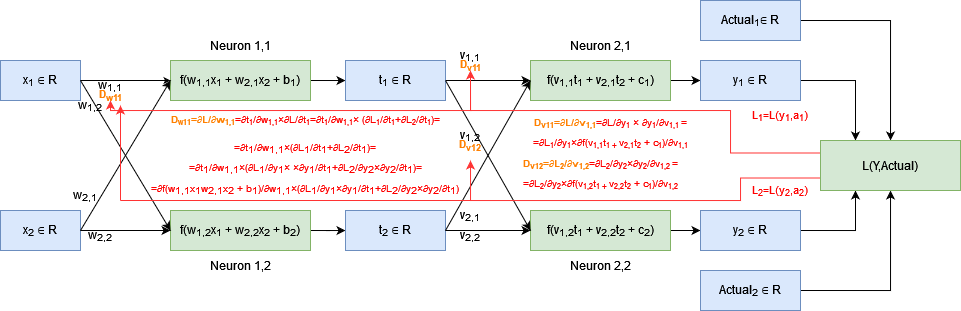

Ze względu na to, że na początku liczymy błąd dla warstwy najbliżej wyjścia, a później idziemy coraz głębiej w stronę wejścia, nazywamy ten proces **propagacją wsteczną** (backpropagation).

### Jak dobrać strukturę sieci?

Jest to bardzo złożone zagadanienie, którego automatyzacja jest dopiero rozwijana (większość badań pochodzi z 2019 i później).


*   Więcej neuronów - więcej informacji, bardziej złożone separacje przestrzeni lub aproksymacje funkcji, zdolność do rozwiązywania bardziej skomplikowanych problemów
*   Mniej neuronów - szybsze uczenie, mniejsze ryzyko przeuczenia, lepsza generalizacja problemów

### Dobra generalizacja problemu

Chcemy, żeby sieci dobrze radziły sobie nie tylko z naszym zbiorem wykorzystanym do ich uczenia, ale żeby raczej odnalazły separację występującą faktycznie "w rzeczywistości", żeby dało się je wykorzystywać do prawdziwych problemów. Zbyt wiele epok uczenia może doprowadzić do tzw. **przeuczenia sieci**, czyli do momentu, w którym sieć polepsza wyniki na zbiorze uczącym kosztem gorszych wyników na ogólnym problemie. Wówczas uczy się ona danych treningowych "na pamięć", zaś sam model nie przedstawia dobrze generalizacji problemu.

Zastanówmy się nad generalizacją problemów na przykładzie poniższego podziału przestrzeni:

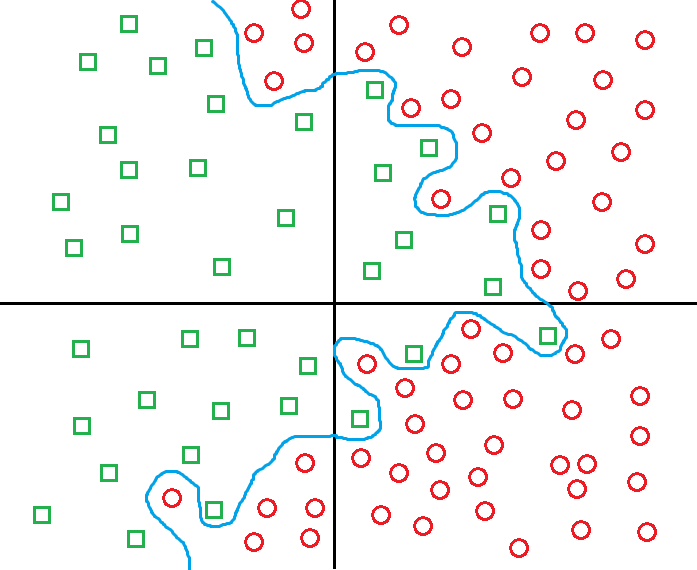

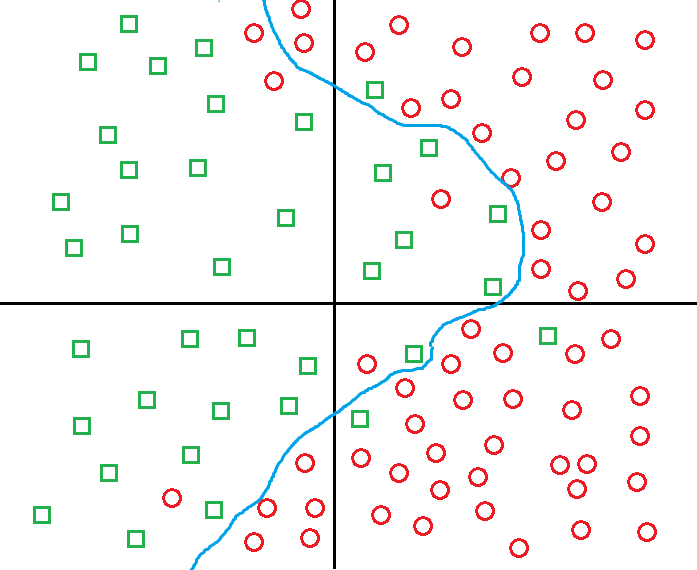

In [7]:
# teraz spróbujmy już zaimplementować wielowarstową sieć neuronową do bardziej złożonego problemu.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)


# odsyłamy oczywiście do dokumentacji po wyjaśnienie argumentów, ale pokrótce:
# solver - algorytm uczący, SGD = Stochastic Gradient Descent
# hidden_layer_sizes - rozmiary ukrytych warstw
# activation - funkcja aktywacji, identity = liniowa

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)
matrix

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  0, 40]])

In [8]:
network.score(X_train,y_train)

0.9833333333333333

In [9]:
predicted_labels_test = network.predict(X_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)
matrix_test

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [10]:
network.score(X_test,y_test)

0.9666666666666667

In [11]:
# możemy jak zwykle zobaczyć wagi neuronów...
network.coefs_

[array([[-0.52523805,  0.36993188, -0.56396903, -0.61139659,  0.38965484,
          0.00374317,  0.58164612,  0.06485443,  0.08431492,  0.02524852],
        [-0.38154031,  0.54957956,  0.24314655, -0.31632112,  0.35223258,
          0.22169436,  0.11633421,  0.56155307,  0.48129446, -0.40475208],
        [ 0.52191565, -0.42035069,  0.45254209,  0.35869781, -0.38979176,
         -0.05690083,  0.62095409, -0.33083572, -0.36942216, -0.1885214 ],
        [-0.2388541 , -0.50742079,  0.52958136, -0.43277128,  0.04540863,
          0.3648648 ,  0.43636545, -0.76854478, -0.59238359,  0.27055067]]),
 array([[ 0.42657717, -0.67405935,  0.23111241,  0.43377719, -0.51528033],
        [ 0.76140194,  0.68384219,  0.17368127,  0.70242899, -0.13605108],
        [-0.46077876, -0.18126129, -0.36019576,  0.05057262, -0.14890441],
        [ 0.37838324,  0.48954897, -0.32705658, -0.24194456, -0.40070332],
        [ 0.640021  , -0.05375182, -0.32783742,  0.25370398,  0.05210806],
        [-0.25727953,  0.55

In [12]:
# ...i biasy:
network.intercepts_

[array([-0.1466112 , -0.04592241, -0.35277063, -0.52377423, -0.37340342,
         0.6499232 , -0.50208454, -0.4463957 ,  0.43676635, -0.03957583]),
 array([ 0.57518061, -0.47378219, -0.44705913, -0.30386877, -0.12555386]),
 array([-0.77210267,  0.65555876, -0.08405501])]

## Zadania do samodzielnego wykonania

1.

Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

2.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

3.

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

4.

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, należy jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Warto zauważyć, że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

#### Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

* https://ipython.readthedocs.io/en/stable/interactive/magics.html - funkcja do uproszczonego liczenia czasu wykonywania kodu w notatniku.

<Figure size 800x600 with 0 Axes>

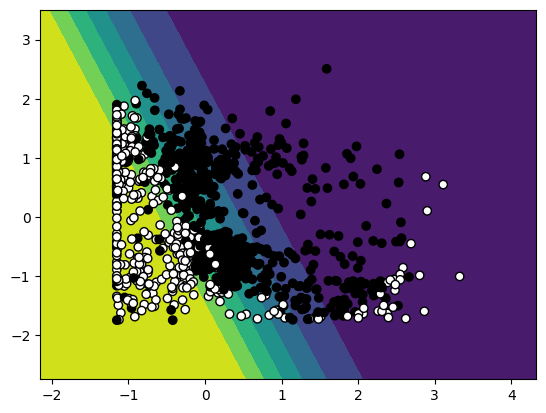

layer:(1, 1) acccuracy: 0.8444444444444444


<Figure size 800x600 with 0 Axes>

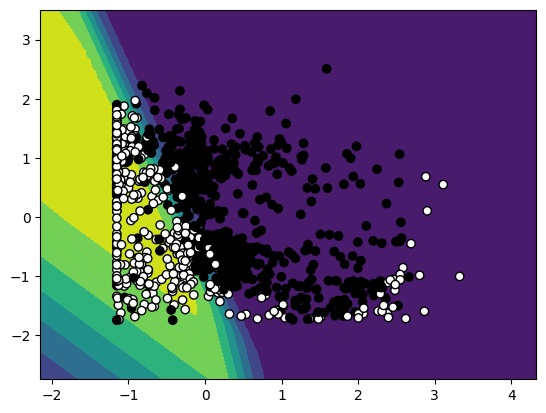

layer:(5, 2) acccuracy: 0.8518518518518519


<Figure size 800x600 with 0 Axes>

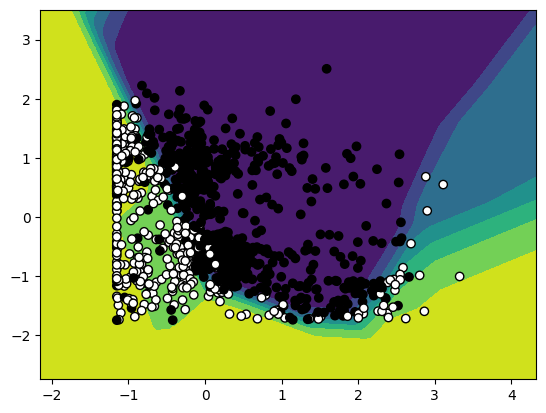

layer:(10, 5) acccuracy: 0.9111111111111111


<Figure size 800x600 with 0 Axes>

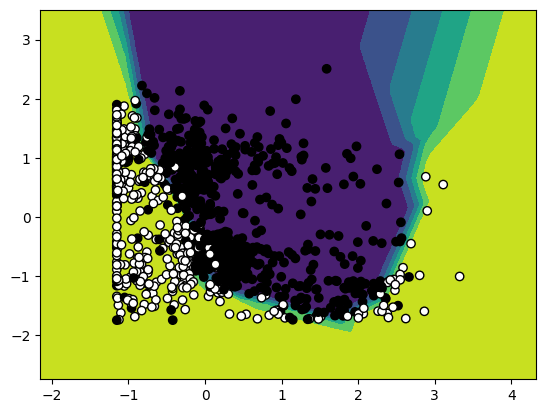

layer:(10, 5, 2) acccuracy: 0.9074074074074074


<Figure size 800x600 with 0 Axes>

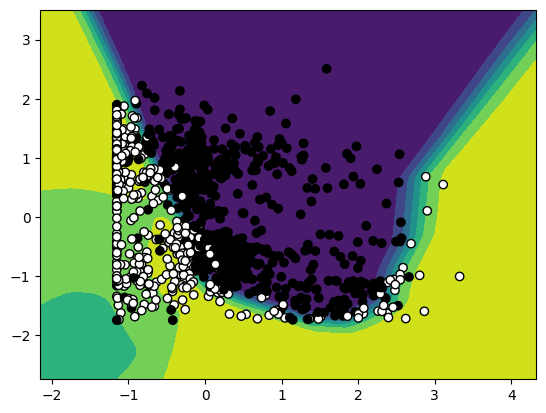

layer:(100, 50, 20) acccuracy: 0.9111111111111111


In [63]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.inspection import DecisionBoundaryDisplay

data = pd.read_csv('medicine.txt', sep = ',', header = None)
data = data.drop(0)
# print(data.head())
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data.iloc[:,0:2])
y = data.iloc[:,2]
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for layer in [(1,1), (5,2),(10,5), (10,5,2),(100,50,20)]:
  network = MLPClassifier(hidden_layer_sizes=layer, max_iter=1000, random_state=42)

  network.fit(X_train,y_train)
  predicted_labels = network.predict(X_test)


  plt.figure(figsize=(8,6))
  display = DecisionBoundaryDisplay.from_estimator(network, X_train, cmap='viridis')
  plt.scatter(X_train[:,0],X_train[:,1], c=y_train, edgecolors='k')
  plt.show()
  print(f"layer:{layer} acccuracy: {network.score(X_test,y_test)}")


Najlepiej poradziła sobie warstwa (10, 5), gdyż uzyskała najwyższą trafność na zbiorze testowym. Zbyt duża liczba neuronów w warstwach prowadzi do overfittingu, zbyt mała - do underfittingu.

**ZADANIE 2**


In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5,5,5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)

print(network.score(X_test,y_test))


0.9305555555555556


Skuteczność wyniosła 0.93 dla zbioru testowego, co jest wynikiem zadowalającym.

ZADANIE 3


In [53]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for layer in [(10, 5), (10, 5,5,5), (30, 25,25,15)]:
    for epoch in [100, 200, 500]:
        network = MLPClassifier(hidden_layer_sizes=layer, max_iter = epoch, tol = 0.001)
        network.fit(X_train,y_train)
        predicted_labels = network.predict(X_test)
        matrix = confusion_matrix(y_test, predicted_labels)
        if layer == (10, 5, 5, 5):
            print(f'layer: {layer}, epoch: {epoch}, score: {network.score(X_test,y_test)}')
            print(matrix)



/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


layer: (10, 5, 5, 5), epoch: 100, score: 0.6027777777777777
[[33  0  0  0  0  2  0  1  0  0]
 [ 0  0 15  0 14  0  0  4  4  0]
 [ 0  0  7  0  9  0  0 18  1  0]
 [ 0  0  0 35  0  1  0  1  0  0]
 [ 0  0  0  0 33  0  3  0  0  0]
 [ 2  0  0  1  0 33  0  0  0  0]
 [ 1  0  0  1  2  0 32  0  0  0]
 [ 2  0  4  0  0  0  0 30  0  0]
 [ 1  0  5  2 14  0  0  8  3  2]
 [ 7  0  0  9  0  5  0  3  1 11]]


/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


layer: (10, 5, 5, 5), epoch: 200, score: 0.9083333333333333
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  3  2]
 [ 0  0 29  1  0  0  0  0  5  0]
 [ 0  1  0 36  0  0  0  0  0  0]
 [ 0  2  0  0 33  0  1  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  1  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 34  0  1]
 [ 0  3  3  3  0  0  0  0 25  1]
 [ 0  1  0  1  0  0  0  1  2 31]]


/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


layer: (10, 5, 5, 5), epoch: 500, score: 0.8666666666666667
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  2  0  0  0  0  0  0  0]
 [ 0  1 29  0  1  0  0  1  3  0]
 [ 4  0  0 29  0  1  0  1  0  2]
 [ 0  2  1  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 33  3  0  0  0]
 [ 0  0  2  0  0  2 32  0  0  0]
 [ 0  0  0  0  2  3  0 31  0  0]
 [ 0  1  2  0  0  1  0  0 27  4]
 [ 0  0  2  4  0  1  0  1  1 27]]


Zwiększenie liczby epok jak i ilości warst ukrytych uczenia zwiększa skuteczność klasyfikacji. Jednak w przypadku zbyt dużej liczby epok lub warst  uczenia, sieć może zacząć się przeuczać, co oznacza, że zamiast generalizować, zaczyna zapamiętywać dane uczące. W przypadku zbyt małej liczby epok uczenia, sieć może nie zdążyć nauczyć się wszystkich wzorców. 


In [56]:
# Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD.

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for rate in [0.1,0.01,0.001,0.0001]:
    network = MLPClassifier(hidden_layer_sizes=(10, 5,5,5), max_iter = epoch, tol = 0.001, learning_rate_init=rate)
    network.fit(X_train,y_train)
    predicted_labels = network.predict(X_test)
    matrix = confusion_matrix(y_test, predicted_labels)
    print(f'rate: {rate}, score: {network.score(X_test,y_test)}')
    print(matrix)



rate: 0.1, score: 0.1
[[ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]]
rate: 0.01, score: 0.8333333333333334
[[35  0  1  0  0  0  0  0  0  0]
 [ 1 19  2  0  1  0  1  0 12  1]
 [ 1  0 32  0  0  0  2  0  0  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  2  0  0 34  0  0  0  0  0]
 [ 0  0  2  3  0 30  0  0  0  1]
 [ 2  0  1  0  0  0 31  0  2  0]
 [ 0  1  0  0  0  0  0 30  0  5]
 [ 0  2  0  0  0  2  2  0 27  2]
 [ 0  1  0  1  0  6  0  0  2 26]]
rate: 0.001, score: 0.9166666666666666
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  1  0  5  1  1  0]
 [ 0  0 34  0  0  0  1  0  0  0]
 [ 0  0  0 33  0  1  0  1  1  1]
 [ 0  2  1  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  2 34  0  0  0]
 [ 0  0 

/home/skolanko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Parametr learning_rate określa jak szybko sieć ma się uczyć. Wartość learning_rate=0.1 jest zbyt duża, co powoduje, że sieć może nie nauczyć się wzorców. Wartość learning_rate=0.0001 jest zbyt mała, co powoduje, że sieć uczy się zbyt wolno.

ZADANIE 4


In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 
  
# data (as pandas dataframes) 
X = yeast.data.features 
y = yeast.data.targets  

In [17]:
X.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [18]:
X.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [19]:
y.value_counts()

localization_site
CYT                  463
NUC                  429
MIT                  244
ME3                  163
ME2                   51
ME1                   44
EXC                   35
VAC                   30
POX                   20
ERL                    5
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
np.unique(y)

/home/skolanko/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

network = MLPClassifier (hidden_layer_sizes=(50,30,20),activation='relu', max_iter = 1000, tol = 0.001, solver='adam')

start_time = time.time()
network.fit(X_train,y_train)
end_time = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(f'czas uczenia: {end_time-start_time}')
print(network.score(X_test,y_test))
print(matrix)


czas uczenia: 1.2817294597625732
0.6094276094276094
[[63  0  0  0  0  2  6 22  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 2  0  3  1  0  0  1  0  0  0]
 [ 0  0  0  7  0  2  0  0  0  0]
 [ 1  0  0  2  1  2  0  4  0  0]
 [ 1  0  0  0  0 29  1  1  0  0]
 [14  0  0  0  1  1 29  2  2  0]
 [33  0  0  0  0  4  3 46  0  0]
 [ 1  0  0  0  0  0  0  0  3  0]
 [ 2  0  1  0  0  1  0  2  0  0]]


Zadanie 4 wnioski: Biorąc pod uwagę fakt, iż niektóre klasy są znacznie liczniejsze od innych, trafność na poziomie 0.5 jest dobra. Warto zauważyć, że w przypadku tak nierównych klas, trafność 0.5 oznacza, że klasyfikator jest w stanie rozpoznać klasy znacznie lepiej niż losowo. Model więc jest  stronniczy wobec klas, które są nadreprezentowane w danych. Może to prowadzić do wyższej dokładności dla tych klas kosztem klas mniej reprezentowanych.